<a href="https://colab.research.google.com/github/AbheyTiwari/AI_hallucination/blob/main/AI_Hallucinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install scikit-learn pandas numpy

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv('hallucination_simulated_data.csv')

# ✅ Selected features after checking for multicollinearity
features = ['Data_Quality', 'Model_Confidence', 'Input_Ambiguity', 'Interaction_IA', 'Noise']

# Target column
target = 'Hallucinated'

# Scale the features to normalize them (important for logistic regression!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Add intercept manually for statsmodels
X_const = sm.add_constant(X_scaled)
y = df[target]

# Fit logistic regression
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# Show summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.103606
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:           Hallucinated   No. Observations:                  200
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            5
Date:                Sat, 05 Apr 2025   Pseudo R-squ.:                  0.8505
Time:                        18:15:49   Log-Likelihood:                -20.721
converged:                       True   LL-Null:                       -138.59
Covariance Type:            nonrobust   LLR p-value:                 6.301e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5742      0.766      3.361      0.001       1.073       4.075
x1            -2.8597      0

Accuracy: 0.96
Confusion Matrix:
 [[94  4]
 [ 4 98]]
ROC-AUC Score: 0.9938975590236094


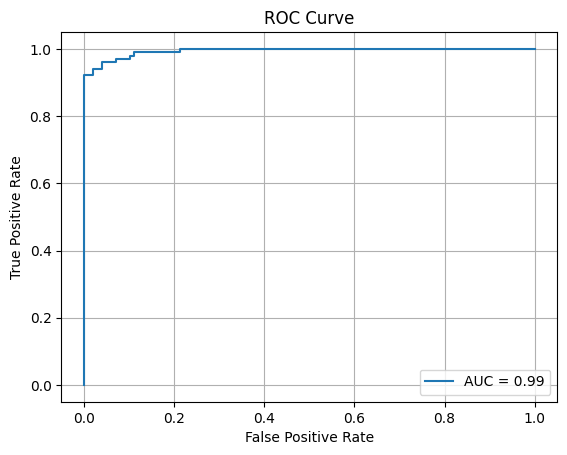

In [14]:
# Predict probabilities and classify
df['predicted_prob'] = result.predict(X_const)
df['predicted_class'] = (df['predicted_prob'] >= 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y, df['predicted_class'])
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y, df['predicted_class'])
print("Confusion Matrix:\n", cm)

# ROC-AUC
roc_auc = roc_auc_score(y, df['predicted_prob'])
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y, df['predicted_prob'])
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
